In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

0     NaN
1     4.0
2    30.0
3    43.0
4    43.0
5    15.0
Name: Attractive Level, dtype: float64
Original Data : 


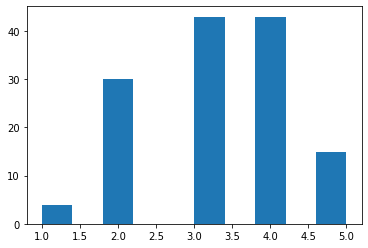

In [ ]:
filename = 'Annotation.xlsx'
file = pd.read_excel(filename)
print(file.apply(pd.Series.value_counts)['Attractive Level'].head(6))
print("Original Data : ")
plt.figure()
plt.hist(file["Attractive Level"])
plt.show()


In [ ]:
#Data Analysis
vars = ["Sound", "Music", "Noise control", "Speaking Style", "Camera", "Stable", "Angel diversity", "Images", "Resolution", "Color", "Content", "Introduction", "Food description", "Reviewer", "Reviewer emotion", "Recommendation", "Clear information"]

def corr(data, X, Y):
  plt.figure()
  print(X +  " and "+ Y)
  for x in set(data[X]):
    y = data[ data[X] == x][Y].mean()
    plt.plot(x, y, 'ro')
  plt.show()

#for x in vars:
#    corr(file, "Attractive Level", x)

In [ ]:
#selected data
vars = ["Sound", "Music", "Noise control", "Speaking Style", "Camera", "Stable", "Angel diversity", "Images", "Color", "Content", "Introduction", "Food description", "Reviewer", "Reviewer emotion", "Recommendation", "Clear information"]

In [ ]:
#Solve imbalance data
def smote(file, vars: list):
    data1 = file[file['Attractive Level']==1]
    file = data = pd.concat([file, data1],axis=0)
    X = file[vars]
    Y = file['Attractive Level']
    oversample = SMOTE(random_state=42)
    X, Y = oversample.fit_resample(X, Y)
    data = pd.concat([X, Y],axis=1)
    data_train, data_test= train_test_split(data, test_size = 0.2, shuffle=True)
    X_train = data_train[vars]
    Y_train = data_train['Attractive Level']
    X_test = data_test[vars]
    Y_test = data_test['Attractive Level']
    return X_train, Y_train, X_test, Y_test

linear Regresstion

In [ ]:
#linear Regresstion
def linearRegression(X_train, Y_train, X_test, Y_test):
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    #print(lr.coef_)

    prediction_test = lr.predict(X_test)
    prediction_train = lr.predict(X_train)
    print(np.array(Y_test))
    print(prediction_test)
    from sklearn.metrics import f1_score

    print('R_quare (train):', r2_score(Y_train, prediction_train))
    print('R_quare (test):', r2_score(Y_test, prediction_test))
    print('F1 score (train):', f1_score(prediction_train.round(), Y_train.round(), average='macro'))
    print('F1 score (test):', f1_score(prediction_test.round(), Y_test.round(), average='macro'))
    #print('MSE:', mean_squared_error(Y_test, prediction))

    def checkAcc(Y, prediction):
      count = 0
      Y = np.array(Y)
      for i, rs in enumerate(list(prediction)):
        if rs.round() == Y[i]:
          count = count +1
      return count/len(Y)
    print("Accuracy (train): "+ str(checkAcc(Y_train, prediction_train)))
    print("Accuracy (test): "+ str(checkAcc(Y_test, prediction_test)))

# Original Data
file = pd.read_excel(filename)
data_train, data_test= train_test_split(file, test_size = 0.2, shuffle=True)
X = data_train[vars]
Y = data_train['Attractive Level']
X_test = data_test[vars]
Y_test = data_test['Attractive Level']
print("Original Data")
linearRegression(X, Y, X_test, Y_test)

# SMOTE
file = pd.read_excel(filename)
X_train, Y_train, X_test, Y_test = smote(file, vars)
print("SMOTE")
linearRegression(X_train, Y_train, X_test, Y_test)

Original Data
[2 3 3 3 3 4 3 3 3 4 4 5 2 2 5 1 4 2 5 2 3 5 4 3 5 3 4]
[2.57890557 3.21522353 2.75278423 3.34909234 2.58521816 3.57588334
 3.35334651 3.43677466 2.80490633 4.06129649 3.5430481  4.44395017
 2.518382   2.68339495 4.92942051 1.63969431 4.10384615 2.24762243
 4.90694133 2.89202867 3.06029248 4.59769122 2.9805392  2.77547957
 4.72521312 2.88687423 3.93555387]
R_quare (train): 0.8017191394796619
R_quare (test): 0.8385667318239918
F1 score (train): 0.6378582489577129
F1 score (test): 0.5615873015873016
Accuracy (train): 0.7685185185185185
Accuracy (test): 0.7407407407407407


NameError: name 'SMOTE' is not defined

Logistic Regression

In [ ]:
#Logistic Regression

dataLgR = pd.read_excel(filename)
#transform data
for i, y in enumerate(dataLgR["Attractive Level"]):
    if y == 1 or y ==2:
      dataLgR["Attractive Level"][i] = 0
    else:
      dataLgR["Attractive Level"][i] = 1

def logisticRegression(X, Y, X_test, Y_test):
  lg = LogisticRegression()
  lg.fit(X, Y)

  prediction = lg.predict(X_test)
  print(np.array(Y_test))
  print(prediction)

  print("Score (train): "+ str(lg.score(X,Y )))
  print("Score (test): "+ str(lg.score(X_test, Y_test)))

data_train, data_test= train_test_split(dataLgR, test_size = 0.2, shuffle=False)
X = data_train[vars]
Y = data_train['Attractive Level']
X_test = data_test[vars]
Y_test = data_test['Attractive Level']
print("Original Data")
logisticRegression(X, Y, X_test, Y_test)

X, Y, X_test, Y_test = smote(dataLgR, vars)
print("SMOTE")
logisticRegression(X, Y, X_test, Y_test)

Classification (using support vector machine)

In [ ]:
#SVM
def SVM(X, Y, X_test, Y_test):
  svm = SVR(kernel = 'rbf')
  svm.fit(X,Y)
  print("Score (train): "+ str(svm.score(X,Y )))
  print("Score (test): "+ str(svm.score(X_test, Y_test)))

file = pd.read_excel(filename)
data_train, data_test= train_test_split(file, test_size = 0.2, shuffle=False)
X = data_train[vars]
Y = data_train['Attractive Level']
X_test = data_test[vars]
Y_test = data_test['Attractive Level']
print("Original Data")
SVM(X, Y, X_test, Y_test)
print('SMOTE')
X, Y, X_test, Y_test = smote(file, vars)
SVM(X, Y, X_test, Y_test)

k Mean

In [ ]:
Data = pd.read_excel('Annotation.xlsx')
varData = ["Sound", "Music", "Noise control", "Speaking Style", "Camera", "Stable", "Angel diversity", "Images", "Resolution", "Color", "Content", "Food description", "Reviewer", "Reviewer emotion", "Recommendation", "Clear information"]

Cl_data = Data[varData]
#elbow method
K = range(2, 11)
wss = []
for k  in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(Cl_data)
    wss_iter =kmeans.inertia_
    wss.append(wss_iter)
sns.scatterplot(x=K, y=wss)

In [ ]:
Cl_data = Data[['Sound', 'Camera', 'Images', 'Reviewer']]   
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(Cl_data)
Cl_data["Attractive Level"] = Data[['Attractive Level']]
Cl_data["clusters"] = kmeans.labels_
Cl_data.groupby('clusters').agg(
{
    "Attractive Level": "mean",
    "Sound" : 'mean', 
    "Camera"  : 'mean',  
    "Images"  : 'mean', 
    "Reviewer" : 'mean' 
}
).round()